# 여러 보행에 대한 파라미터를 통계적 분석하기.

### Firebase에서 데이터 가져오기.

In [100]:
# firebase url설정과 비공개 key 세팅

import firebase_admin
from firebase_admin import credentials

from firebase_admin import firestore

from firebase_admin import db

if not firebase_admin._apps:
    cred = credentials.Certificate("gait-analysis-7350b-firebase-adminsdk-czbst-e78dd10970.json")
    firebase_admin.initialize_app(cred,{'databaseURL':'https://gait-analysis-7350b-default-rtdb.asia-southeast1.firebasedatabase.app/230128_jihun'})

### 데이터 정규성 판단하기 (정규 분포를 따르는지)

- 직관성 => **Q-Q plot**

- 정규성 => **Shapiro - wilk Test**

#### Shapiro wilk Test (샤피로 윌크 검정)

2000개 이하의 데이터에 대하여 정규성을 검정하는 테스트.

- 귀무가설: 해당 데이터는 정규 분포를 따른다.

- 대립가설: 해당 데이터는 정규 분포를 따르지 않는다.

- P-value => 유의수준인 0.05이하이면 귀무가설을 기각, 대립가설을 채택하여, "해당 데이터는 정규 분포를 따르지 않는다"라는 가설이 채택된다. 

하지만 0.05이상이면 귀무가설을 채택하여, "해당 데이터는 정규 분포를 따른다"라는 가설이 채택된다.

<hr>

In [101]:
import pandas as pd
import numpy as np
def getDataName(directory):
    dir = db.reference(directory)
    data = np.array(dir.get())
    
    return data

## Heel Strike 정규성 판단

In [102]:
total_heelStrike = getDataName('Total/Heel Strike')

In [103]:
total_heelStrike.sort()

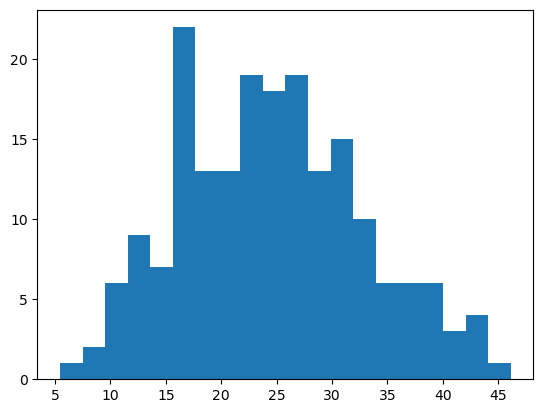

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성

# 히스토그램 그리기
plt.hist(total_heelStrike, bins=20)
plt.show()


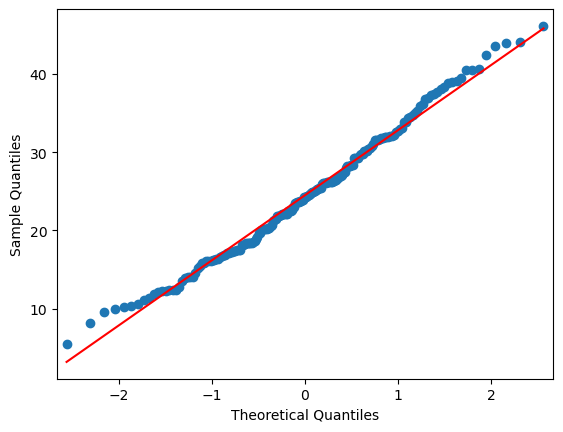

In [105]:
import statsmodels.api as sm
import numpy as np

# 데이터 생성

# Q-Q 플롯 그리기
sm.qqplot(total_heelStrike, line='s')
plt.show()

In [106]:
from scipy import stats
import numpy as np

# 예시 데이터 생성

# Shapiro-Wilk test 실행
stat, p = stats.shapiro(total_heelStrike)

# 결과 출력
print("Shapiro-Wilk test 결과")
print("검정 통계량(W) : {:.4f}".format(stat))
print("p-value : {:.4f}".format(p))


Shapiro-Wilk test 결과
검정 통계량(W) : 0.9879
p-value : 0.1002


- Q-Q plot => 우방향인 정확한 직선을 띄고 있으므로 직관적으로 확인했을 때에는 Heel Strike는 정규성을 띈다.

- Shapiro-wilk Test => p-value가 0.2가 나왔으므로, 귀무가설이 채택. 즉, 해당 데이터는 정규 분포를 따른다라는 가설이 채택됨. 덧붙여 검정 통계량인 w-statisc의 값이 1에 아주 가까운 0.99가 나왔으므로,

해당 데이터는 정규 분포를 따른다라는 가설이 상당히 타당함.

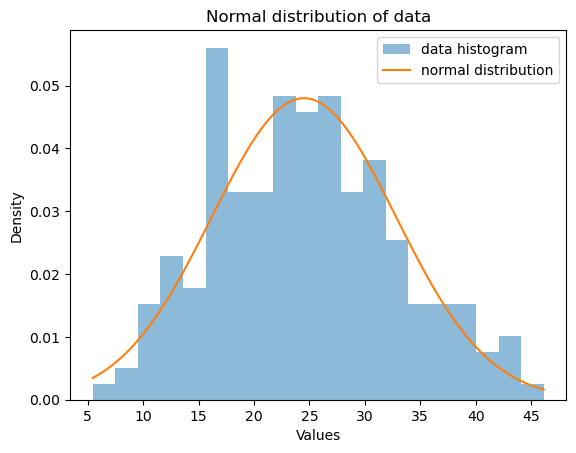

In [107]:
from scipy.stats import norm

# 정규 분포의 밀도 함수를 그리기 위해 필요한 x값들을 설정
x = np.linspace(total_heelStrike.min(), total_heelStrike.max(), 100)

# 데이터의 분포를 그리기 위해 히스토그램을 그림
plt.hist(total_heelStrike, bins=20, density=True, alpha=0.5, label='data histogram')

# 데이터의 분포와 일치하는 정규 분포를 그래프로 나타냄
mu, std = norm.fit(total_heelStrike)
plt.plot(x, norm.pdf(x, mu, std), label='normal distribution')

# 그래프에 타이틀, x축 레이블, y축 레이블, 범례를 추가함
plt.title('Normal distribution of data')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

# 그래프를 출력함
plt.show()


<hr>

## Toe Off 정규성 검사

In [108]:
total_toeOff = np.array(getDataName("Total/Toe Off"))

In [109]:
total_toeOff.sort()

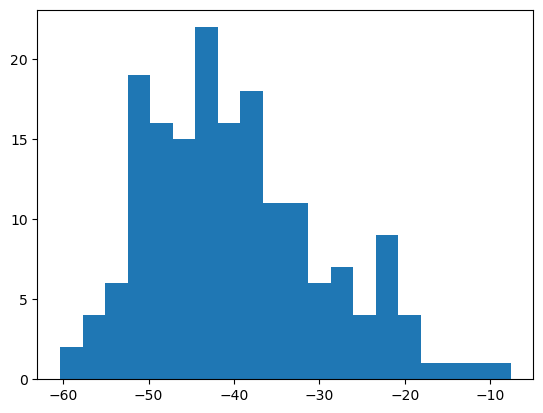

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성

# 히스토그램 그리기
plt.hist(total_toeOff, bins=20)
plt.show()


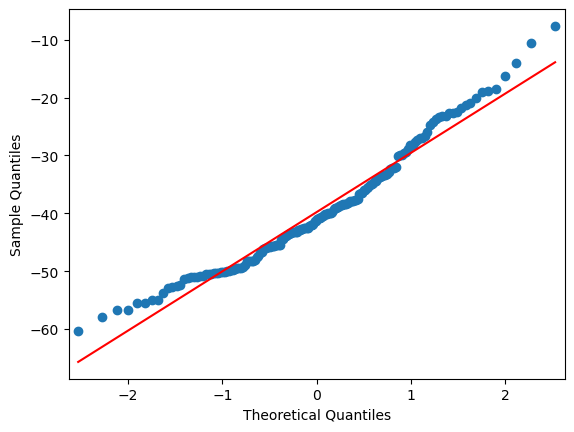

In [111]:
import statsmodels.api as sm
import numpy as np

# 데이터 생성

# Q-Q 플롯 그리기
sm.qqplot(total_toeOff, line='s')
plt.show()

In [112]:
from scipy import stats
import numpy as np

# 예시 데이터 생성

# Shapiro-Wilk test 실행
stat, p = stats.shapiro(total_toeOff)

# 결과 출력
print("Shapiro-Wilk test 결과")
print("검정 통계량(W) : {:.4f}".format(stat))
print("p-value : {:.10f}".format(p))


Shapiro-Wilk test 결과
검정 통계량(W) : 0.9651
p-value : 0.0002380946


- Q-Q plot => 우방향인 정확한 직선을 띄고 있으므로 직관적으로 확인했을 때에는 Heel Strike는 정규성을 띈다.

- Shapiro-wilk Test => p-value가 0.2가 나왔으므로, 귀무가설이 채택. 즉, 해당 데이터는 정규 분포를 따른다라는 가설이 채택됨. 덧붙여 검정 통계량인 w-statisc의 값이 1에 아주 가까운 0.99가 나왔으므로,

해당 데이터는 정규 분포를 따른다라는 가설이 상당히 타당함.

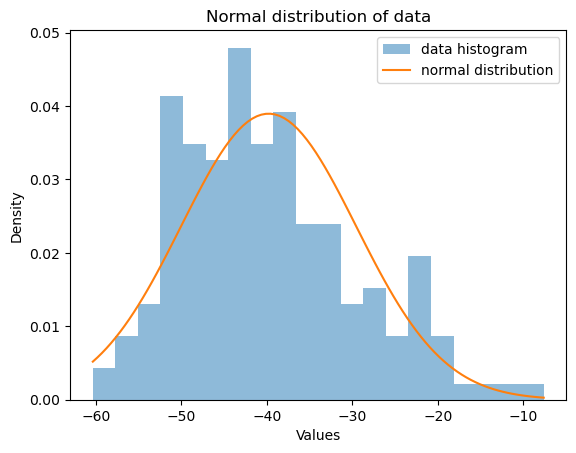

In [113]:
from scipy.stats import norm

# 정규 분포의 밀도 함수를 그리기 위해 필요한 x값들을 설정
x = np.linspace(total_toeOff.min(), total_toeOff.max(), 100)

# 데이터의 분포를 그리기 위해 히스토그램을 그림
plt.hist(total_toeOff, bins=20, density=True, alpha=0.5, label='data histogram')

# 데이터의 분포와 일치하는 정규 분포를 그래프로 나타냄
mu, std = norm.fit(total_toeOff)
plt.plot(x, norm.pdf(x, mu, std), label='normal distribution')

# 그래프에 타이틀, x축 레이블, y축 레이블, 범례를 추가함
plt.title('Normal distribution of data')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

# 그래프를 출력함
plt.show()


<hr>

## Stance State 정규성 검사

In [114]:
total_stance = np.array(getDataName("Total/Stacne State"))

In [115]:
total_stance.sort()

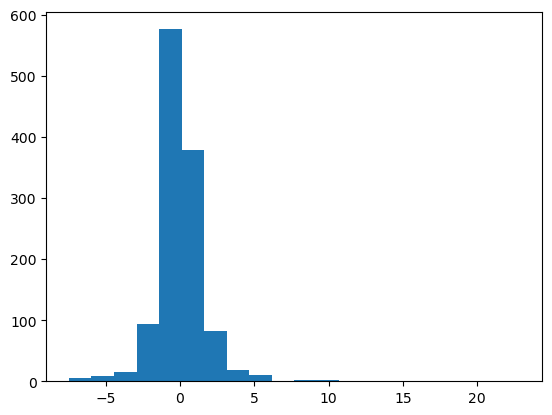

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성

# 히스토그램 그리기
plt.hist(total_stance, bins=20)
plt.show()


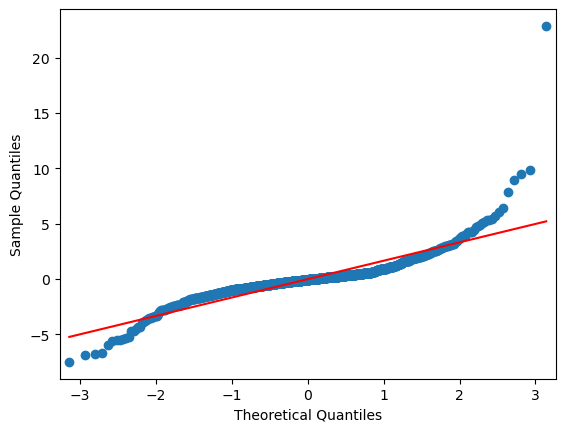

In [117]:
import statsmodels.api as sm
import numpy as np

# 데이터 생성

# Q-Q 플롯 그리기
sm.qqplot(total_stance, line='s')
plt.show()

In [118]:
from scipy import stats
import numpy as np

# 예시 데이터 생성

# Shapiro-Wilk test 실행
stat, p = stats.shapiro(total_stance)

# 결과 출력
print("Shapiro-Wilk test 결과")
print("검정 통계량(W) : {:.4f}".format(stat))
print("p-value : {:.10f}".format(p))


Shapiro-Wilk test 결과
검정 통계량(W) : 0.7986
p-value : 0.0000000000


- Q-Q plot => 우방향인 정확한 직선을 띄고 있으므로 직관적으로 확인했을 때에는 Heel Strike는 정규성을 띈다.

- Shapiro-wilk Test => p-value가 0.2가 나왔으므로, 귀무가설이 채택. 즉, 해당 데이터는 정규 분포를 따른다라는 가설이 채택됨. 덧붙여 검정 통계량인 w-statisc의 값이 1에 아주 가까운 0.99가 나왔으므로,

해당 데이터는 정규 분포를 따른다라는 가설이 상당히 타당함.

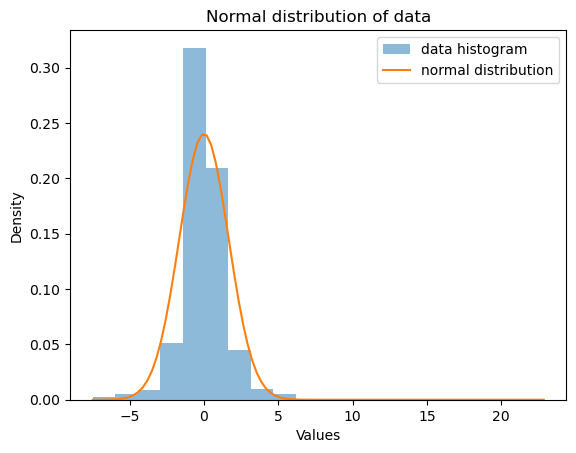

In [119]:
from scipy.stats import norm

# 정규 분포의 밀도 함수를 그리기 위해 필요한 x값들을 설정
x = np.linspace(total_stance.min(), total_stance.max(), 100)

# 데이터의 분포를 그리기 위해 히스토그램을 그림
plt.hist(total_stance, bins=20, density=True, alpha=0.5, label='data histogram')

# 데이터의 분포와 일치하는 정규 분포를 그래프로 나타냄
mu, std = norm.fit(total_stance)
plt.plot(x, norm.pdf(x, mu, std), label='normal distribution')

# 그래프에 타이틀, x축 레이블, y축 레이블, 범례를 추가함
plt.title('Normal distribution of data')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

# 그래프를 출력함
plt.show()


## Inital Swing 정규성 검사

In [120]:
inital_swing = np.array(getDataName("Total/Inital Swing"))

In [121]:
inital_swing.sort()

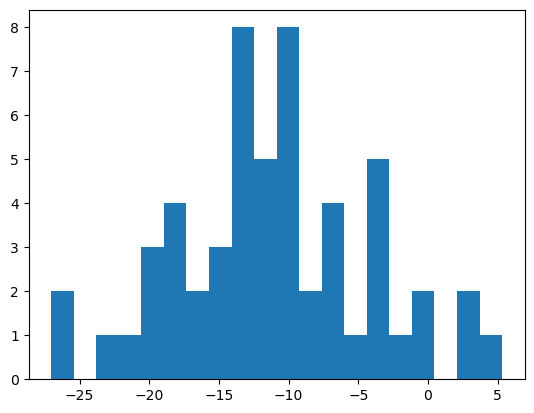

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성

# 히스토그램 그리기
plt.hist(inital_swing, bins=20)
plt.show()


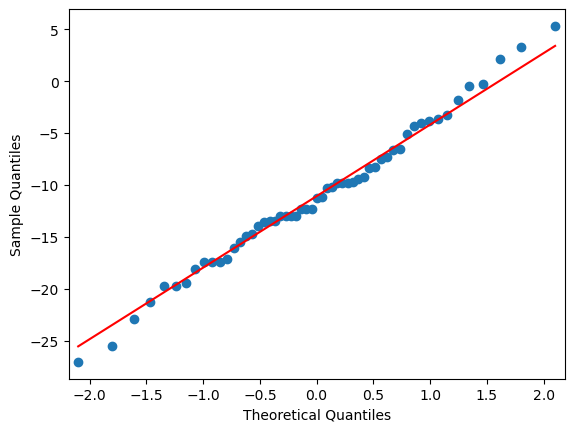

In [123]:
import statsmodels.api as sm
import numpy as np

# 데이터 생성

# Q-Q 플롯 그리기
sm.qqplot(inital_swing, line='s')
plt.show()

In [124]:
from scipy import stats
import numpy as np

# 예시 데이터 생성

# Shapiro-Wilk test 실행
stat, p = stats.shapiro(inital_swing)

# 결과 출력
print("Shapiro-Wilk test 결과")
print("검정 통계량(W) : {:.4f}".format(stat))
print("p-value : {:.10f}".format(p))


Shapiro-Wilk test 결과
검정 통계량(W) : 0.9916
p-value : 0.9659426808


- Q-Q plot => 우방향인 정확한 직선을 띄고 있으므로 직관적으로 확인했을 때에는 Heel Strike는 정규성을 띈다.

- Shapiro-wilk Test => p-value가 0.2가 나왔으므로, 귀무가설이 채택. 즉, 해당 데이터는 정규 분포를 따른다라는 가설이 채택됨. 덧붙여 검정 통계량인 w-statisc의 값이 1에 아주 가까운 0.99가 나왔으므로,

해당 데이터는 정규 분포를 따른다라는 가설이 상당히 타당함.

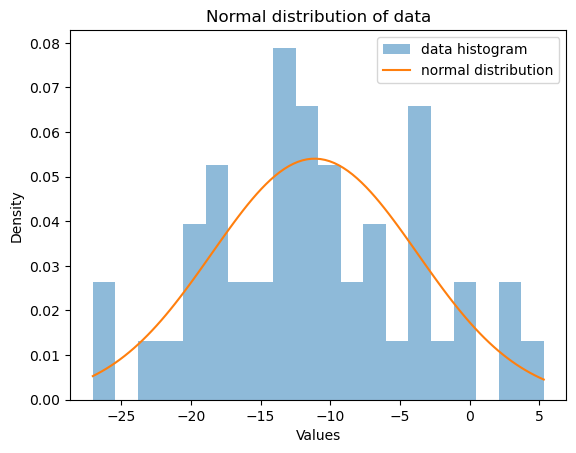

In [99]:
from scipy.stats import norm

# 정규 분포의 밀도 함수를 그리기 위해 필요한 x값들을 설정
x = np.linspace(inital_swing.min(), inital_swing.max(), 100)

# 데이터의 분포를 그리기 위해 히스토그램을 그림
plt.hist(inital_swing, bins=20, density=True, alpha=0.5, label='data histogram')

# 데이터의 분포와 일치하는 정규 분포를 그래프로 나타냄
mu, std = norm.fit(inital_swing)
plt.plot(x, norm.pdf(x, mu, std), label='normal distribution')

# 그래프에 타이틀, x축 레이블, y축 레이블, 범례를 추가함
plt.title('Normal distribution of data')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

# 그래프를 출력함
plt.show()


<hr>